# PROPHET

## Install Package

In [1]:
!pip install prophet

In [32]:
from prophet import Prophet
from prophet.plot import add_changepoints_to_plot
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import pickle

import warnings
warnings.filterwarnings('ignore')

In [23]:
df = pd.read_csv('data/cleaned_data.csv', parse_dates=['date'], index_col='date')

## Model Training

In [26]:
df_prophet = df.reset_index().rename(columns={'date': 'ds', 'production': 'y'})

train_data = df_prophet[df_prophet['ds'] < '2018-01-01']
test_data = df_prophet[df_prophet['ds'] >= '2018-01-01']

model = Prophet(seasonality_mode='multiplicative')  
model.fit(train_data)


future = model.make_future_dataframe(periods=len(test_data), freq='MS')
forecast = model.predict(future)

actual = test_data['y'].values
predicted = forecast.loc[forecast['ds'].isin(test_data['ds']), 'yhat'].values

mse = mean_squared_error(actual, predicted)
rmse = np.sqrt(mse)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')

14:02:27 - cmdstanpy - INFO - Chain [1] start processing
14:02:28 - cmdstanpy - INFO - Chain [1] done processing


Mean Squared Error (MSE): 7.003490531078551
Root Mean Squared Error (RMSE): 2.646410877221931


In [33]:
# with open('prophet_model.pkl', 'wb') as f:
#     pickle.dump(model, f)

## In-Sample Predictions

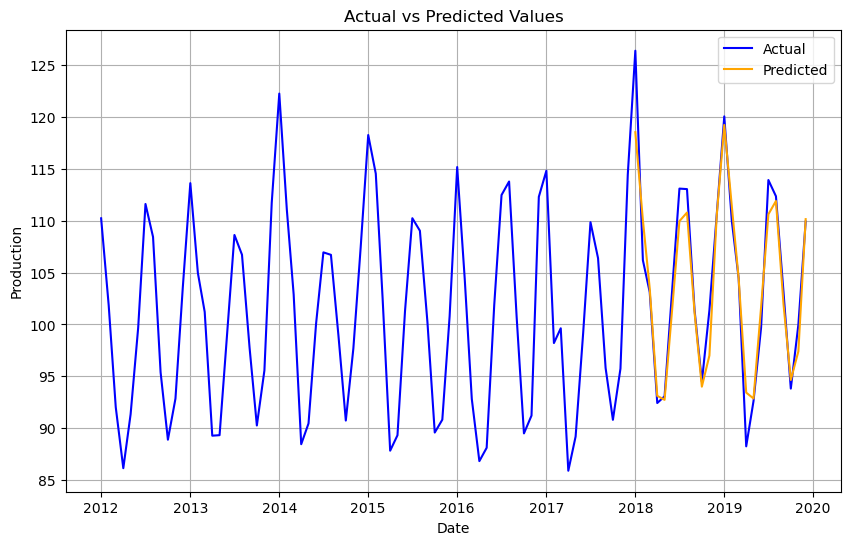

In [29]:
comparison_df = test_data[['ds', 'y']].copy()  
comparison_df['predicted'] = predicted  
t = df['2012':]
plt.figure(figsize=(10, 6))
plt.plot(t.index, t['production'], label='Actual', color='blue')
plt.plot(comparison_df['ds'], comparison_df['predicted'], label='Predicted', color='orange')
plt.xlabel('Date')
plt.ylabel('Production')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.grid(True)
plt.show()

## Out-of-Sample Predictions

In [30]:

df_prophet = df.reset_index()[['date', 'production']].rename(columns={'date': 'ds', 'production': 'y'})

model = Prophet(seasonality_mode='multiplicative')  
model.fit(df_prophet)
future = model.make_future_dataframe(periods=96, freq='MS')  # For 3 years
forecast = model.predict(future)



14:02:52 - cmdstanpy - INFO - Chain [1] start processing
14:02:52 - cmdstanpy - INFO - Chain [1] done processing


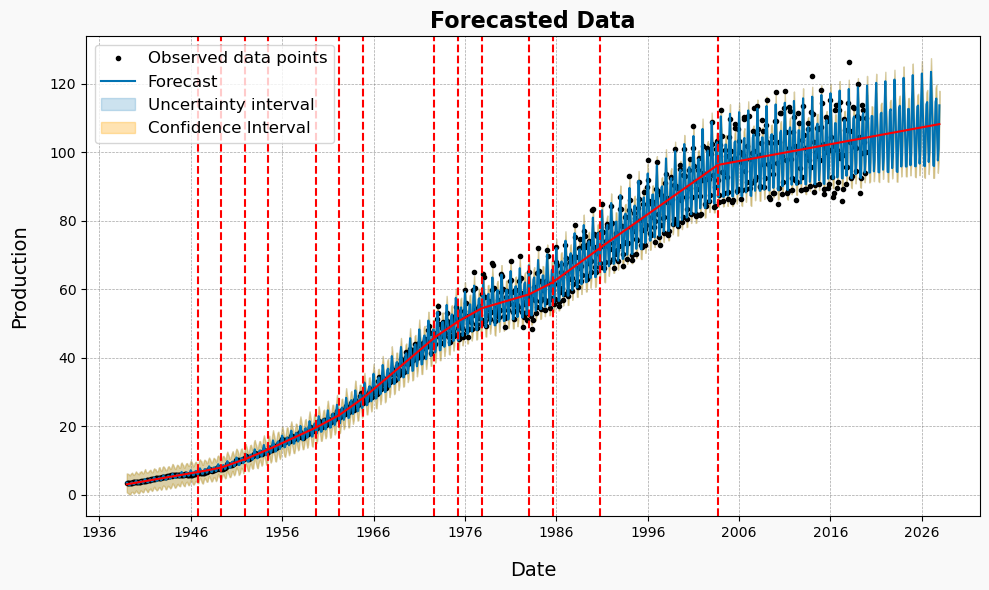

In [31]:

# Create the default Prophet plot
fig1 = model.plot(forecast)

# Add customization
ax = fig1.gca()  # Get current axes

# Enhance titles and labels
ax.set_title("Forecasted Data", fontsize=16, fontweight='bold')
ax.set_xlabel("Date", fontsize=14, labelpad=15)
ax.set_ylabel("Production", fontsize=14, labelpad=15)

# Adjust grid and background
ax.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)
fig1.set_facecolor('#f9f9f9')  # Light background

# Add confidence interval customization
ax.fill_between(
    forecast['ds'], 
    forecast['yhat_lower'], 
    forecast['yhat_upper'], 
    color='orange', 
    alpha=0.3, 
    label='Confidence Interval'
)

# Add changepoints (optional, if changepoints are detected)
add_changepoints_to_plot(ax, model, forecast)

# Add legend and tighten layout
ax.legend(loc='upper left', fontsize=12)
plt.tight_layout()

# Show the plot
plt.show()